In [ ]:
# TODO: insert code for launching cpu- and gpu execs

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


figsizeConst = (11.6, 7.)
plt.rc('figure', figsize=(11.6, 6.))
plt.rc('font', size=20)
plt.rc('lines', linewidth=4, linestyle='-', marker='o', markersize=12)

#%matplotlib inline

#import seaborn as sns
#sns.set()

In [16]:
file1 = pd.read_csv('speedups_ap_model.txt', header=0)


file1_np = file1.to_numpy()
print(file1_np[:, 0]) # loop over rows

dims_cell_map = []
nums_cells_total = []

for i in range(len(file1_np[:, 0])):
    x_dim = str(int(np.sqrt(file1_np[i, 0])))
    dims_cell_map.append(x_dim + ' x ' + x_dim)
    
    nums_cells_total.append(int(file1_np[i, 0]))
    
#print(cell_map_dims) # loop over rows

file1.insert(0, 'Размерность карты', dims_cell_map, True)
file1.insert(1, 'Общее число клеток', nums_cells_total, True)

# deleting column from txt-file, filled with "ugly"-repr data
#file1.drop([1, 3])
del file1['# Число клеток'] #file1.drop(columns=['# Число клеток'])

file1_final = file1 #file1.drop(file1.index[[1,3]]) # deleting unused rows #1 and #3

#render dataframe as html
file1_final.to_html('ap_model_table.html')

# pretty display
file1_final
#file1_final.to_html()

[ 1024.  4096. 10000. 16384.]


,Размерность карты,Общее число клеток,Время расчета CPU,Время расчета GPU,Ускорение
0,32 x 32,1024,1.52,6.34,0.239748
1,64 x 64,4096,6.20,5.02,1.235060
2,100 x 100,10000,15.36,6.39,2.403756
3,128 x 128,16384,25.33,6.29,4.027027


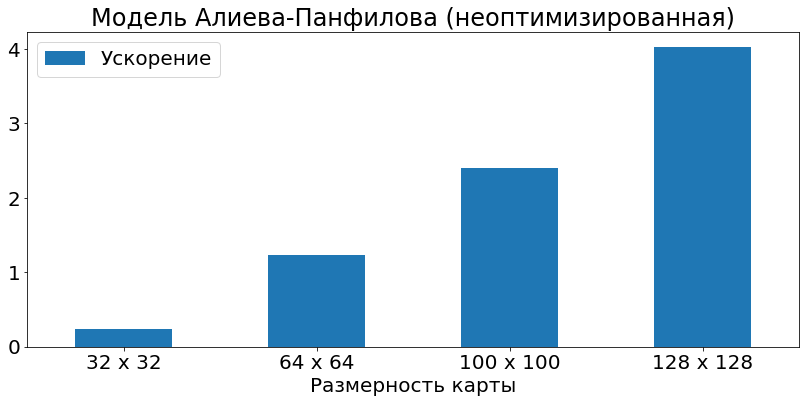

In [17]:
#file1.plot(x='Число сегментов сетки', y='Ускорение', style='-o') # "standart" printing X vs Y
#file1.plot(x='# Число клеток', y='Ускорение', style='-o') # "standart" printing X vs Y
plot_bars = file1_final.plot(kind='bar',x='Размерность карты', y='Ускорение', title='Модель Алиева-Панфилова (неоптимизированная)')
#file1_final.plot(x='Размерность карты', y='Время расчета GPU', title='Модель Билера-Рейтера (неоптимизированная)')

# saving pics to a file
plt.xticks(rotation='horizontal')
plt.tight_layout()
plt.savefig('ap_model_no_opt.pdf')

#fig = plot_bars.get_figure()
#plt.show()

In [ ]:
# tmp code
2**5